In [2]:
from src.models.gpt import GPTModel
from dataclasses import dataclass
from src.utils import Tokenizer
import torch
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import Plotter, pad_to

In [3]:
@dataclass
class Config:
    batch_size = 2048
    epochs = 1000
    vocab_size = 550
    lr = 6e-4
    wd = 1e-5
    n_embed = 256
    num_blocks = 4
    num_heads = 4
    head_size = n_embed // num_heads
    context_len = 64
    attn_drop_value = 0.2
    multihead_drop_value = 0.2
    ffn_drop_value = 0.2
    min_tokens = 5


config = Config()

model = GPTModel.load_from_checkpoint("checkpoints/main.ckpt", config=config)

In [4]:
df = pd.read_csv("data/raw/all_climbs.csv", index_col=0)
plotter = Plotter()
tokenizer = Tokenizer(df["frames"])

In [5]:
prompts = ["p1151 r12 p1153 r12", "p1234 r13 p1136 r12", "p1379 r14 p1157 r12", "p1340 r13 p1360 r13"]
encoded_prompts = pad_to(
    torch.stack([tokenizer.encode(prompt) for prompt in prompts])[:, :-1],
    config.context_len,
    tokenizer.encode_map[tokenizer.pad_token],
).to(model.device)
encoded_prompts

tensor([[ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  0, 10,  5, 11,  5],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  0, 19,  6, 17,  5],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  0, 41,  7, 31,  5],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,

In [6]:
generated = model.generate(encoded_prompts, 100)

In [9]:
decoded = [tokenizer.decode(g).replace("[PAD]", "").split("[EOS]")[0].split("[BOS]")[-1].strip() for g in generated]
decoded

['p1151 r12 p1153 r12 p1448 r13 p1339 r13 p1339 r13 p1116 r13 p1489 r15 p1452 r13 p1452 r13 p1260 r13 p1116 r13 p1260 r13 p1289 r14 p1277 r13 p1240 r13 p1334 r15 p1235 r14 p1533 r13 p1334 r15 p1393 r13',
 'p1234 r13 p1136 r12 p1116 r13 p1489 r15 p1452 r13 p1452 r13 p1452 r13 p1202 r13 p1457 r15 p1334 r15 p1185 r13 p1184 r15 p1506 r15 p1489 r15 p1331 r15 p1235 r15 p1369 r15 p1219 r15 p1289 r13 p1454 r15 p1133 r13 p1236 r15 p1122 r13 p1310 r15 p1194 r15 p1516 r13 p1176 r14 p1176 r14 p1197 r15 p1543 r13 p1562 r13 p1166 r13 p1127 r13 p1553 r13 p1146 r12 p1524 r15 p1387 r15 p1548 r12',
 'p1379 r14 p1157 r12 p1452 r13 p1111 r15 p1369 r15 p1452 r13 p1156 r15',
 'p1340 r13 p1360 r13 p1220 r14 p1339 r13']

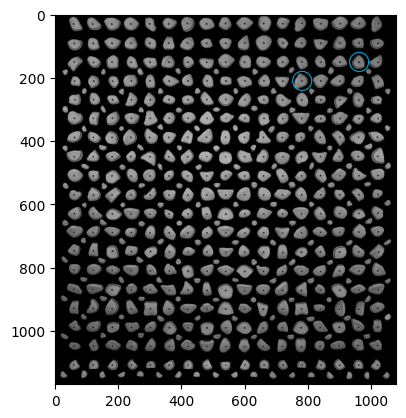

In [21]:
plt.imshow(plotter.plot_climb(prompts[3]))